In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,NaN,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122,70.0,27.0,0.0,36.8,0.340,NaN,0.0
765,5.0,121,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126,60.0,0.0,0.0,30.1,0.349,47.0,1.0


In [9]:
df = df.drop(['Pregnancies','Age','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction'],axis=1)
df

,Glucose,Outcome
0,148,1.0
1,85,0.0
2,183,1.0
3,89,0.0
4,137,1.0
...,...,...
763,101,0.0
764,122,0.0
765,121,0.0
766,126,1.0


In [18]:
df.dropna()
df= df[np.isfinite(df).all(1)]

df

,Glucose,Outcome
0,148,1.0
1,85,0.0
2,183,1.0
3,89,0.0
4,137,1.0
...,...,...
762,89,0.0
763,101,0.0
764,122,0.0
765,121,0.0


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(['Outcome'],axis=1),df['Outcome'],test_size=0.3)

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
prediction = model.predict(x_test)

print("prediction = ",prediction[:5])
print("Actual values = ",np.array(y_test)[:5])


prediction =  [0. 1. 0. 0. 0.]
Actual values =  [0. 0. 0. 1. 0.]


In [28]:
print('Accuracy of logistic regression =',model.score(x_test, y_test))

Accuracy of logistic regression = 0.7445887445887446


Accuracy =  0.7445887445887446
              precision    recall  f1-score   support

         0.0       0.76      0.89      0.82       148
         1.0       0.71      0.49      0.58        83

    accuracy                           0.74       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.74      0.74      0.73       231



<AxesSubplot:>

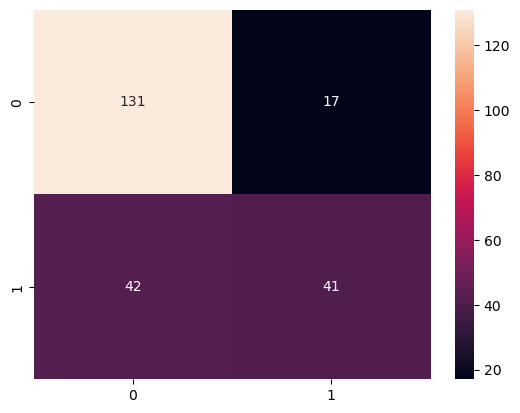

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
cm = confusion_matrix(y_test,prediction)
print("Accuracy = ",accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))
sns.heatmap(cm,annot = True,fmt='0.3g')